In [4]:
import matplotlib.pyplot as plt
import cv2
import kornia as K
import kornia.feature as KF
import numpy as np
import torch
from kornia_moons.feature import *
import torchvision
from kornia_moons.viz import draw_LAF_matches
import torchvision.transforms.functional as F
import torchvision.transforms as T
from algorithm_creation import *

demo images - https://drive.google.com/drive/folders/1OGFfuy957siEEOpz7HVaraS-K_UVj9PN?usp=sharing


## The LoFTR (Detector-Free Local Feature Matching with Transformers) method was used to solve the image matching problem.
This algorithm firstly cuts the source image into specified N parts, as the resolution of satellite images is quite high, so that two images cannot be processed simultaneously. Then LoFTR method is iteratively applied to the cut pairs of images with further saving of keypoints into a single list, the coordinates of which are scaled to the original image. The final step is to apply keypoints to the original image pair.

To start with, let's take two images whose original resolution is 10980x10980 pixels, but compress them to 800x800 pixels, further dividing them into 4 parts and enlarging each to 650x650 pixels.

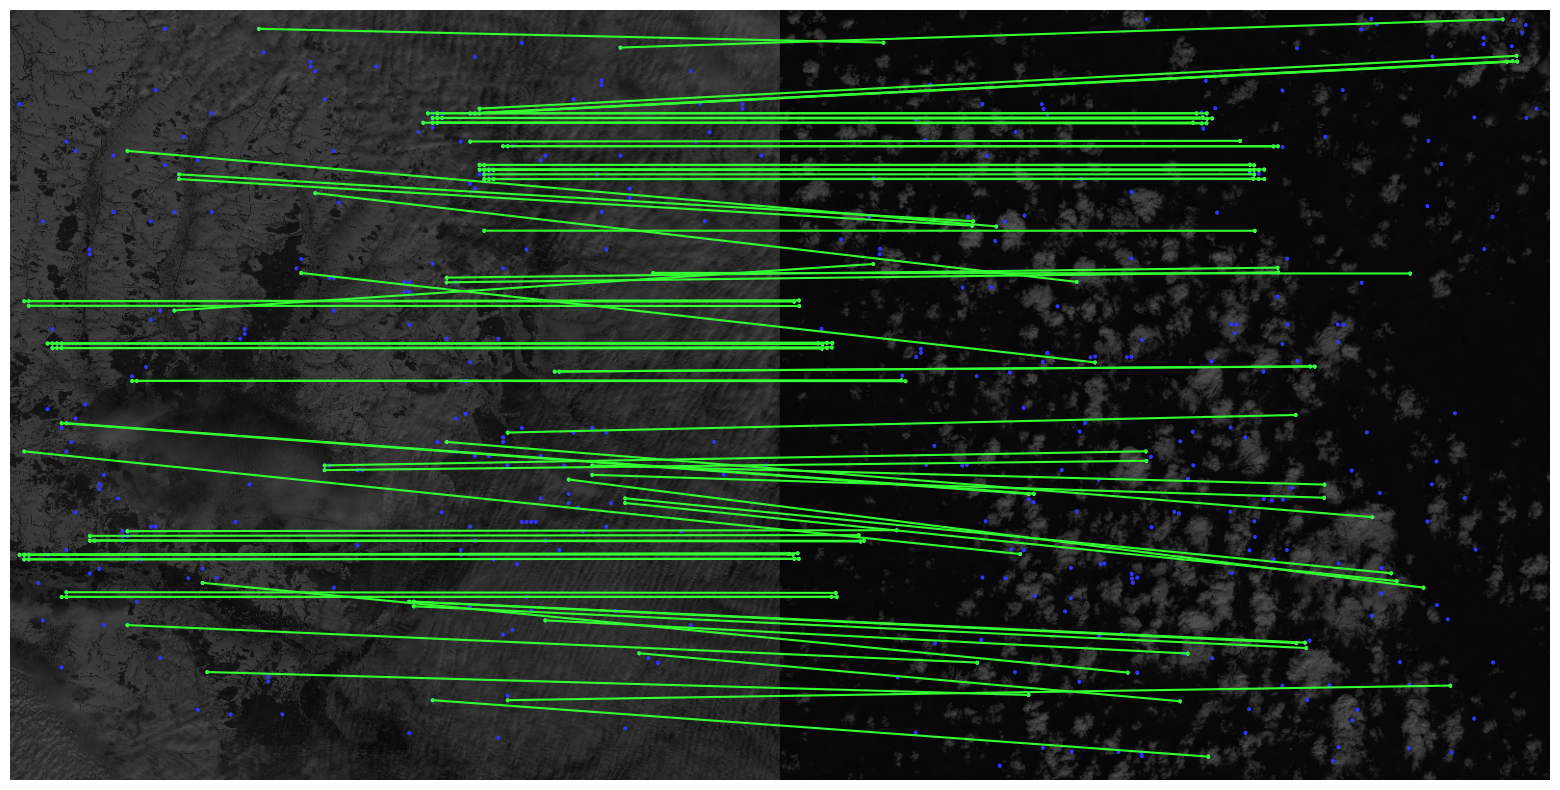

In [7]:
matcher = KF.LoFTR(pretrained='outdoor')

main('/content/drive/MyDrive/img_match_sentinel/jp2_img01.png',
     '/content/drive/MyDrive/img_match_sentinel/jp2_imgNN.png',
      matcher,
      800,
      800,
      4,
      650,
      650)

As we can see, keypoints have been found, but the quantity is small and the quality is poor.

Next, let's load these two images in their original resolution, cut them into 100 equal parts, each 1200x1200 pixels.

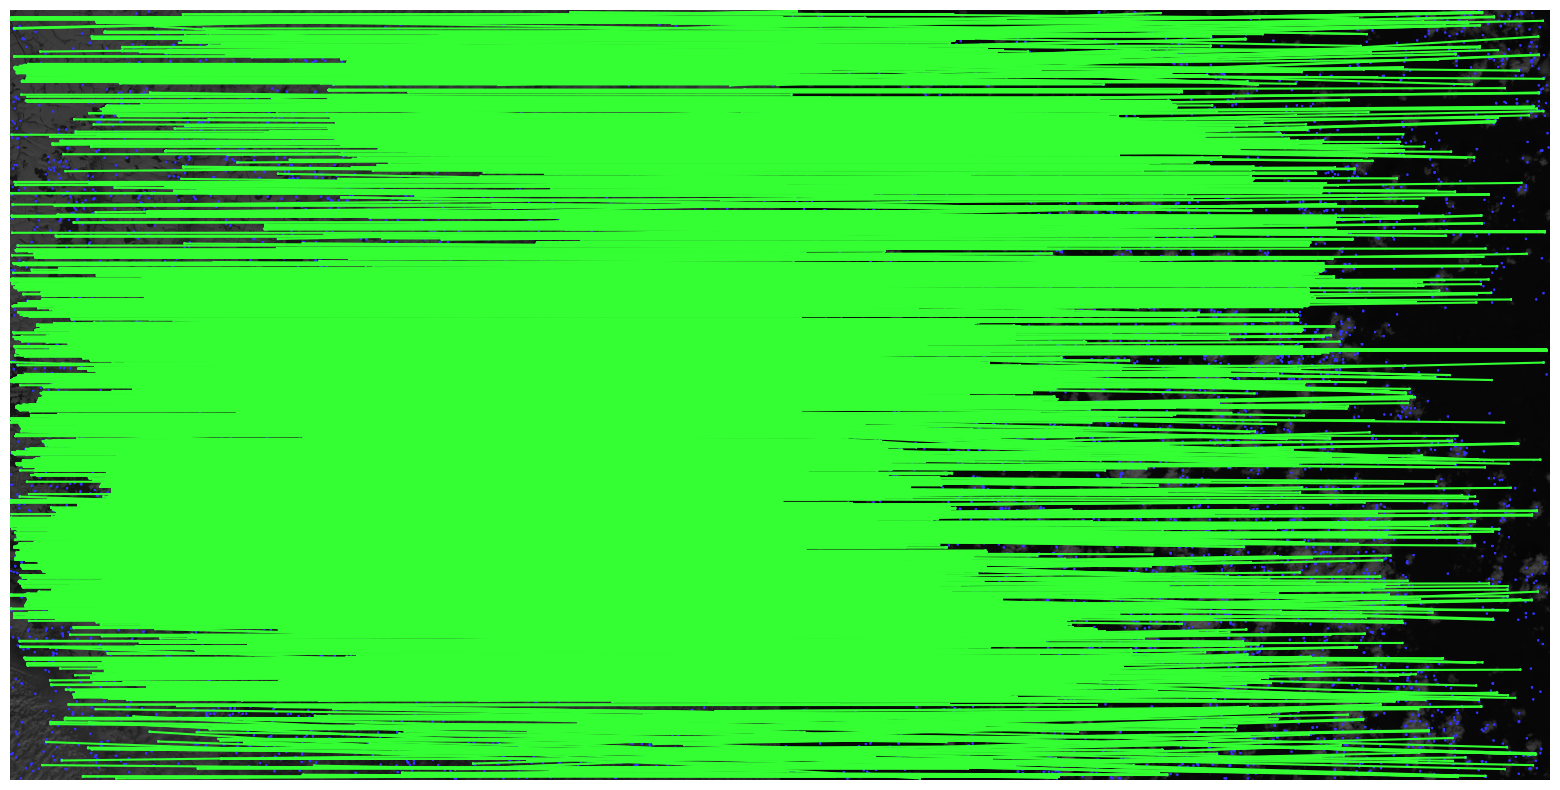

In [8]:
matcher = KF.LoFTR(pretrained='outdoor')

main('/content/drive/MyDrive/img_match_sentinel/jp2_img01.png',
     '/content/drive/MyDrive/img_match_sentinel/jp2_imgNN.png',
      matcher,
      10980,
      10980,
      20,
      1200,
      1200)

In this example, we can clearly see that processing the images in their original quality allowed us to find many keypoints that are of much better quality.

Detailed customisation of keypoint filtering can improve the quality of the result. You can also try to adjust other keypoint search methods like SuperGlue.